In [1]:
import yfinance as yf
import pandas as pd
import numpy as np



# List of tech stock tickers
tech_stocks = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'ROKU']

# Define the date range
start_date = '2014-08-06'
end_date = '2024-08-06' 

# Fetch data for each company
data_frames = {}
for stock in tech_stocks:
    df = yf.download(stock, start=start_date, end=end_date)
    data_frames[stock] = df
    print(f"Downloaded data for {stock}")


[*********************100%%**********************]  1 of 1 completed


Downloaded data for AAPL


[*********************100%%**********************]  1 of 1 completed


Downloaded data for MSFT


[*********************100%%**********************]  1 of 1 completed


Downloaded data for AMZN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Downloaded data for NVDA
Downloaded data for ROKU


In [2]:
# Example: Display the first few rows of Apple's data
Apple_df=display(data_frames['AAPL'].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,20.974588,154232000
2014-08-07,23.732500,23.987499,23.525000,23.620001,20.972370,186844000
2014-08-08,23.565001,23.705000,23.320000,23.684999,21.030083,167460000
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.307556,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.303114,135180000


In [3]:
Amazon_df=display(data_frames['AMZN'].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,15.5415,15.789000,15.5100,15.6945,15.6945,45938000
2014-08-07,15.7605,15.794000,15.4825,15.5725,15.5725,58712000
2014-08-08,15.5970,15.866000,15.5330,15.8400,15.8400,54118000
2014-08-11,15.9240,16.018999,15.8440,15.9165,15.9165,49372000
2014-08-12,15.9445,16.065500,15.8475,15.9660,15.9660,38316000


In [4]:
Microsoft_df=display(data_frames['MSFT'].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,42.740002,43.169998,42.209999,42.740002,36.382137,24634000
2014-08-07,42.840000,43.450001,42.650002,43.230000,36.799263,30314900
2014-08-08,43.230000,43.320000,42.910000,43.200001,36.773716,28942700
2014-08-11,43.259998,43.450001,43.020000,43.200001,36.773716,20351600
2014-08-12,43.040001,43.590000,43.000000,43.520000,37.046120,21431100


In [5]:
NVidia_df=display(data_frames['NVDA'].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,0.43850,0.44650,0.43525,0.4410,0.419804,223456000
2014-08-07,0.44475,0.44875,0.43350,0.4365,0.415521,407696000
2014-08-08,0.45550,0.47750,0.45550,0.4750,0.452170,894348000
2014-08-11,0.47550,0.47750,0.47125,0.4725,0.449791,344624000
2014-08-12,0.47225,0.47500,0.46725,0.4725,0.449791,296152000


In [6]:
Roku_df=display(data_frames['ROKU'].head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-28,15.800000,23.500000,15.750000,23.500000,23.500000,39265900
2017-09-29,26.740000,29.799999,25.469999,26.540001,26.540001,44294700
2017-10-02,25.200001,26.280001,23.260000,23.559999,23.559999,16008400
2017-10-03,23.010000,23.020000,20.770000,20.809999,20.809999,13678500
2017-10-04,21.290001,22.600000,20.820000,20.850000,20.850000,9345700


In [7]:
for stock, df in data_frames.items():
    if df.isnull().values.any():
        print(f"Missing values found in {stock}, handling them...")
        df.fillna(method='ffill', inplace=True)  # Forward fill missing values
        df.fillna(method='bfill', inplace=True)  # Backward fill as backup

    if df.duplicated().any():
        print(f"Duplicate rows found in {stock}, removing them...")
        df.drop_duplicates(inplace=True)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_data_frames = {}

for stock, df in data_frames.items():
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Select relevant columns
    df_scaled = scaler.fit_transform(df)
    cleaned_df = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    cleaned_data_frames[stock] = cleaned_df
    print(f"Data normalized and standardized for {stock}")


Data normalized and standardized for AAPL
Data normalized and standardized for MSFT
Data normalized and standardized for AMZN
Data normalized and standardized for NVDA
Data normalized and standardized for ROKU


In [9]:
display(cleaned_data_frames['AAPL'].head())


,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,-1.065341,-1.066411,-1.061522,-1.064768,0.421663
2014-08-07,-1.064594,-1.064484,-1.064077,-1.066757,0.876714
2014-08-08,-1.067372,-1.069119,-1.067512,-1.065679,0.606239
2014-08-11,-1.063185,-1.063951,-1.060977,-1.060500,0.311542
2014-08-12,-1.059992,-1.060669,-1.057752,-1.060583,0.155821


In [10]:
# Example: Check the first few rows of the cleaned and standardized data for Apple
display(cleaned_data_frames['AMZN'].head())


,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,-1.479091,-1.477336,-1.476691,-1.476801,-0.780293
2014-08-07,-1.474959,-1.477243,-1.477216,-1.479104,-0.466063
2014-08-08,-1.478044,-1.475900,-1.476251,-1.474053,-0.579072
2014-08-11,-1.471874,-1.473047,-1.470306,-1.472609,-0.695820
2014-08-12,-1.471488,-1.472180,-1.470239,-1.471674,-0.967788


In [11]:
display(cleaned_data_frames['MSFT'].head())


,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,-1.118849,-1.119264,-1.119592,-1.119140,-0.345123
2014-08-07,-1.117985,-1.116866,-1.115752,-1.114906,0.068849
2014-08-08,-1.114615,-1.117979,-1.113482,-1.115165,-0.031144
2014-08-11,-1.114356,-1.116866,-1.112522,-1.115165,-0.657185
2014-08-12,-1.116257,-1.115667,-1.112697,-1.112401,-0.578521


In [12]:
display(cleaned_data_frames['NVDA'].head())


,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,-0.648861,-0.648650,-0.650173,-0.649571,-0.958933
2014-08-07,-0.648592,-0.648555,-0.650250,-0.649765,-0.234614
2014-08-08,-0.648129,-0.647341,-0.649282,-0.648106,1.678602
2014-08-11,-0.647269,-0.647341,-0.648589,-0.648214,-0.482575
2014-08-12,-0.647408,-0.647446,-0.648765,-0.648214,-0.673137


In [13]:
display(cleaned_data_frames['ROKU'].head())


,Open,High,Low,Close,Volume
Date,,,,,
2017-09-28,-1.035441,-0.973543,-1.029483,-0.964681,4.194545
2017-09-29,-0.933272,-0.915989,-0.936402,-0.936241,4.879291
2017-10-02,-0.947654,-0.948146,-0.957566,-0.964119,1.027689
2017-10-03,-0.968107,-0.977928,-0.981410,-0.989846,0.710438
2017-10-04,-0.984170,-0.981765,-0.980932,-0.989471,0.120463


In [14]:
import sqlite3

# Connect to SQLite database (or create it)
conn = sqlite3.connect('tech_stock_data.db')

# Store cleaned data in the SQL database
for stock, df in cleaned_data_frames.items():
    df.to_sql(stock, conn, if_exists='replace', index=True)
    print(f"Stored {stock} data in SQL database")

# Close the connection
conn.close()

Stored AAPL data in SQL database
Stored MSFT data in SQL database
Stored AMZN data in SQL database
Stored NVDA data in SQL database
Stored ROKU data in SQL database


In [15]:
# Import libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Get summary statistics for Apple's cleaned data
print(cleaned_data_frames['AAPL'].describe())

               Open          High          Low         Close        Volume
count  2.516000e+03  2.516000e+03  2516.000000  2.516000e+03  2.516000e+03
mean  -9.037110e-17 -9.037110e-17     0.000000 -9.037110e-17 -4.518555e-17
std    1.000199e+00  1.000199e+00     1.000199  1.000199e+00  1.000199e+00
min   -1.085036e+00 -1.082038e+00    -1.083472 -1.083909e+00 -1.394853e+00
25%   -9.100712e-01 -9.126750e-01    -0.909026 -9.108596e-01 -6.749208e-01
50%   -5.469670e-01 -5.480980e-01    -0.548573 -5.477420e-01 -2.655292e-01
75%    9.796275e-01  9.819049e-01     0.980555  9.767780e-01  3.808991e-01
max    2.463888e+00  2.434019e+00     2.447290  2.433392e+00  8.865654e+00


In [16]:
print(cleaned_data_frames['AMZN'].describe())

              Open         High           Low        Close        Volume
count  2516.000000  2516.000000  2.516000e+03  2516.000000  2.516000e+03
mean      0.000000     0.000000 -1.807422e-16     0.000000 -1.807422e-16
std       1.000199     1.000199  1.000199e+00     1.000199  1.000199e+00
min      -1.504024    -1.500982 -1.501732e+00    -1.502234 -1.476745e+00
25%      -0.982814    -0.986252 -9.785454e-01    -0.982784 -6.264008e-01
50%      -0.048270    -0.053333 -4.532106e-02    -0.051971 -2.732131e-01
75%       0.942186     0.941134  9.275866e-01     0.947154  3.226616e-01
max       2.002866     1.980263  2.031735e+00     2.003184  9.826482e+00


In [17]:
print(cleaned_data_frames['MSFT'].describe())

              Open          High          Low         Close        Volume
count  2516.000000  2.516000e+03  2516.000000  2.516000e+03  2.516000e+03
mean      0.000000  9.037110e-17     0.000000 -9.037110e-17  5.648193e-18
std       1.000199  1.000199e+00     1.000199  1.000199e+00  1.000199e+00
min      -1.139588 -1.140071e+00    -1.141325 -1.140307e+00 -1.599113e+00
25%      -0.935440 -9.386735e-01    -0.934076 -9.362772e-01 -5.969732e-01
50%      -0.304333 -3.088774e-01    -0.304127 -3.068210e-01 -2.240660e-01
75%       0.772940  7.840392e-01     0.773486  7.799642e-01  3.053988e-01
max       2.547253  2.521480e+00     2.565842  2.551242e+00  1.261775e+01


In [18]:
print(cleaned_data_frames['NVDA'].describe())

               Open         High           Low        Close        Volume
count  2.516000e+03  2516.000000  2.516000e+03  2516.000000  2.516000e+03
mean   9.037110e-17     0.000000 -4.518555e-17     0.000000 -6.213013e-17
std    1.000199e+00     1.000199  1.000199e+00     1.000199  1.000199e+00
min   -6.495168e-01    -0.649241 -6.508775e-01    -0.650486 -1.657980e+00
25%   -5.568731e-01    -0.557281 -5.581035e-01    -0.557880 -6.443746e-01
50%   -4.056672e-01    -0.406039 -4.057483e-01    -0.406671 -2.044311e-01
75%    1.121361e-01     0.122707  1.148563e-01     0.113956  3.827557e-01
max    5.347698e+00     5.277552  5.158191e+00     5.171552  1.268090e+01


In [19]:
print(cleaned_data_frames['ROKU'].describe())

               Open          High           Low         Close        Volume
count  1.723000e+03  1.723000e+03  1.723000e+03  1.723000e+03  1.723000e+03
mean  -3.299096e-17  9.897287e-17 -4.948644e-17 -4.948644e-17 -6.598191e-17
std    1.000290e+00  1.000290e+00  1.000290e+00  1.000290e+00  1.000290e+00
min   -1.035441e+00 -1.011912e+00 -1.029483e+00 -1.010801e+00 -1.080757e+00
25%   -6.479636e-01 -6.520636e-01 -6.455729e-01 -6.511011e-01 -5.798403e-01
50%   -4.037472e-01 -3.980043e-01 -4.024329e-01 -3.999192e-01 -2.732854e-01
75%    1.967588e-01  1.821937e-01  1.925367e-01  1.911764e-01  2.040749e-01
max    3.273600e+00  3.295137e+00  3.308826e+00  3.301200e+00  7.914476e+00


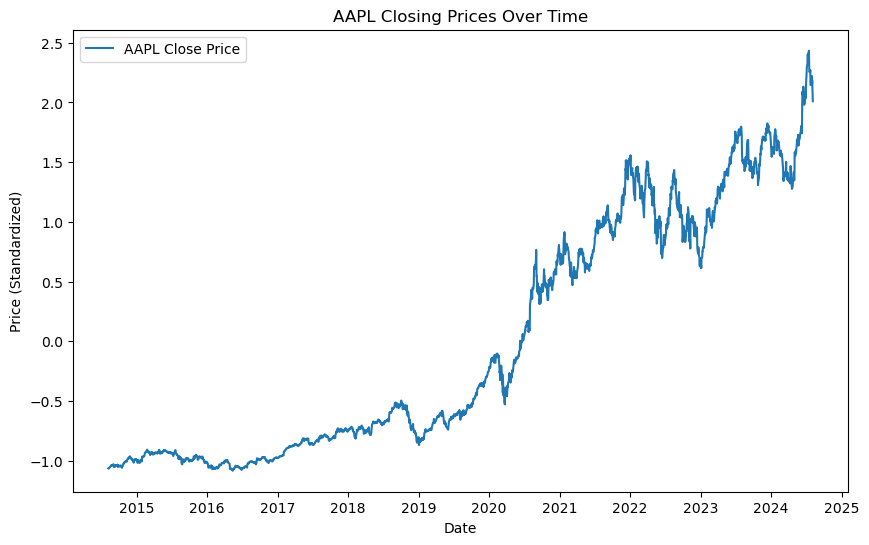

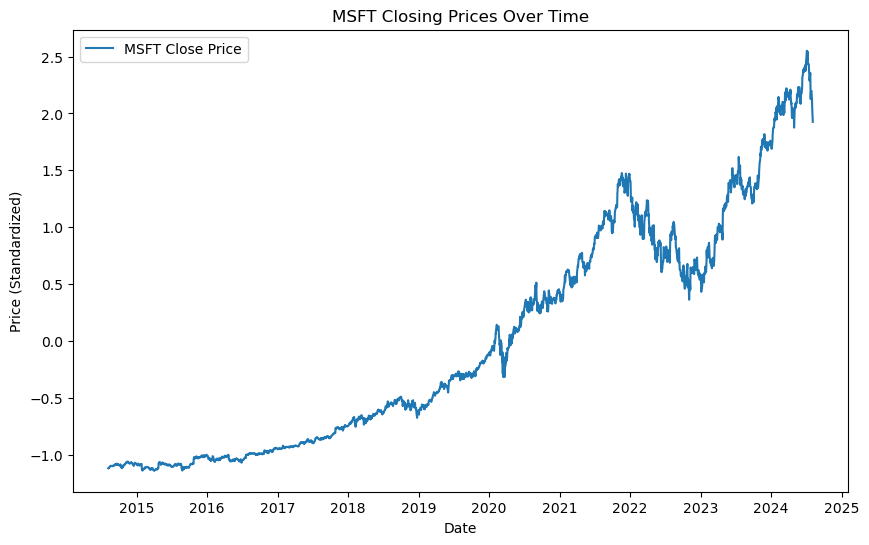

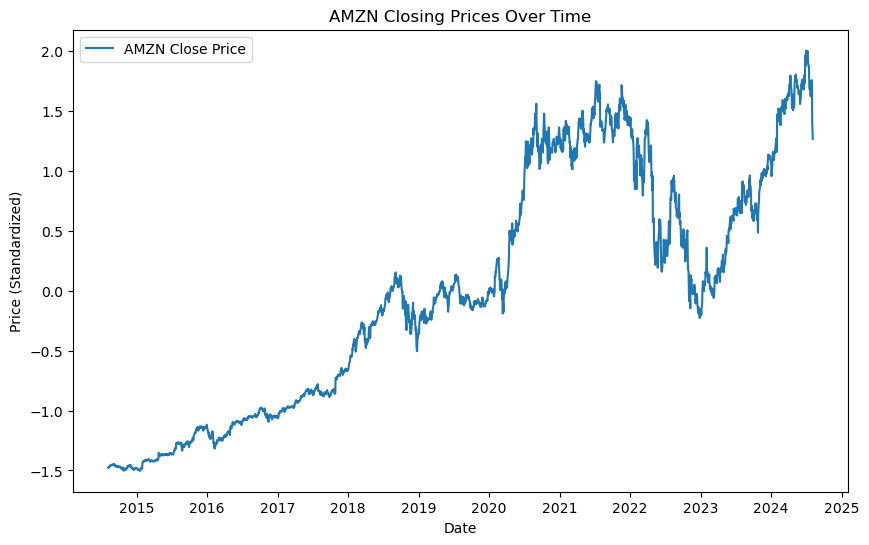

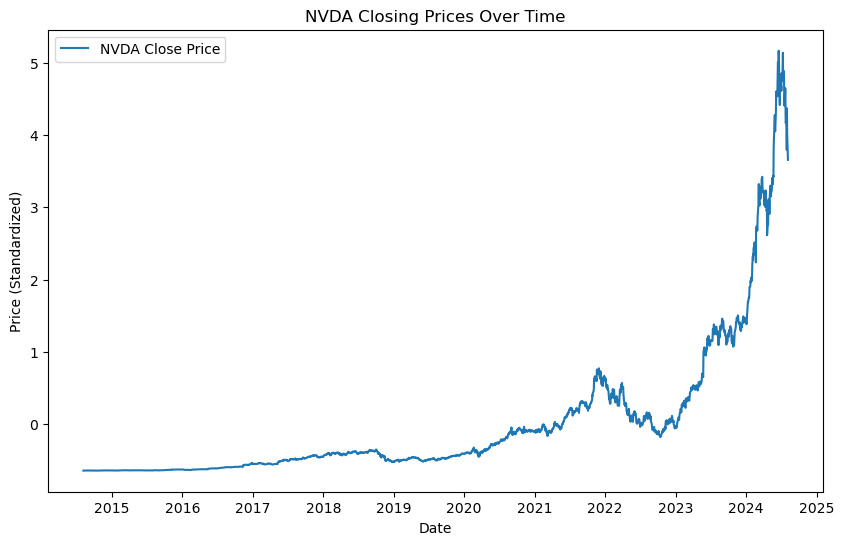

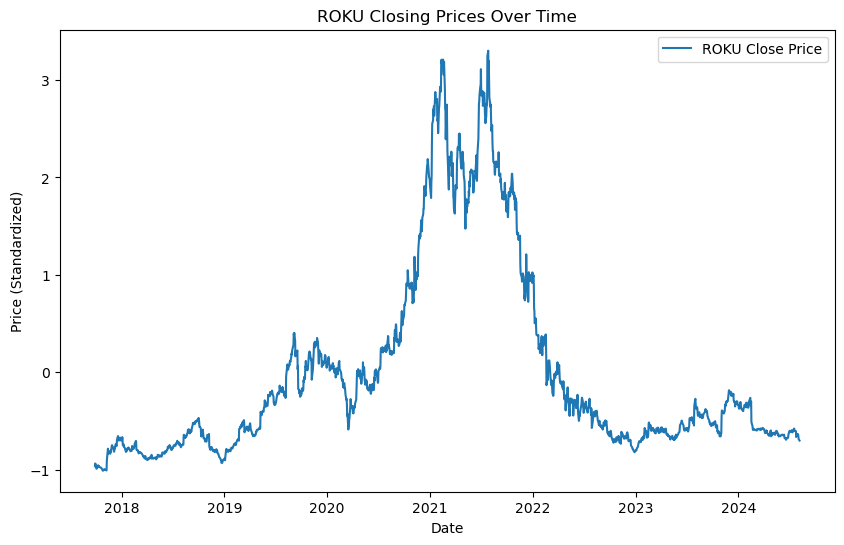

In [20]:
# Plot closing prices over time for each stock
for stock, df in cleaned_data_frames.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label=f'{stock} Close Price')
    plt.title(f'{stock} Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (Standardized)')
    plt.legend()
    plt.show()

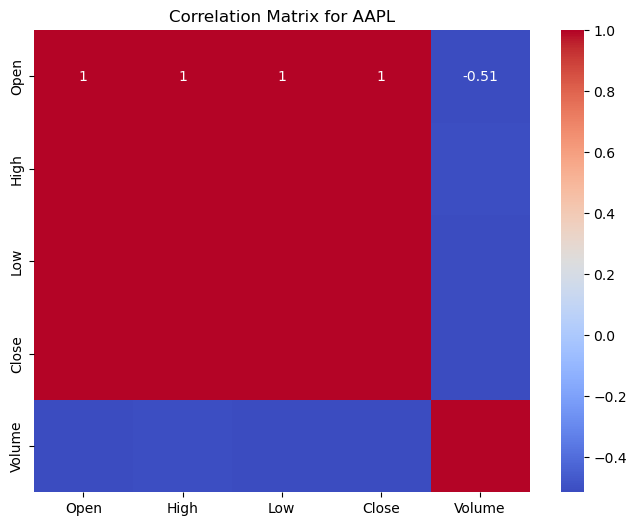

In [21]:
# Correlation heatmap for Apple
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data_frames['AAPL'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for AAPL')
plt.show()

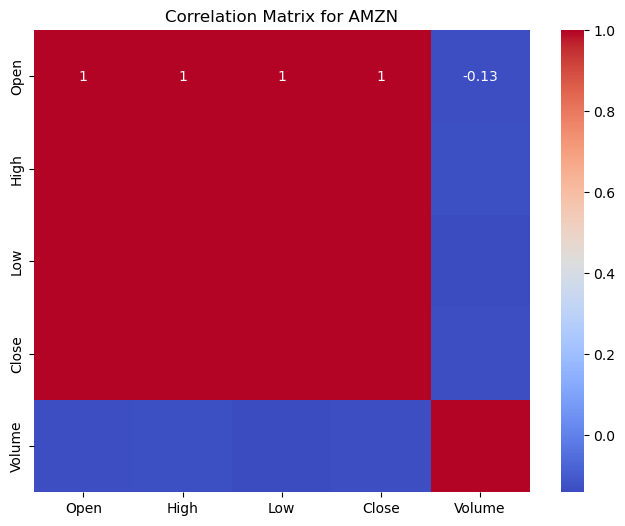

In [22]:
# Correlation heatmap for Amazon
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data_frames['AMZN'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for AMZN')
plt.show()

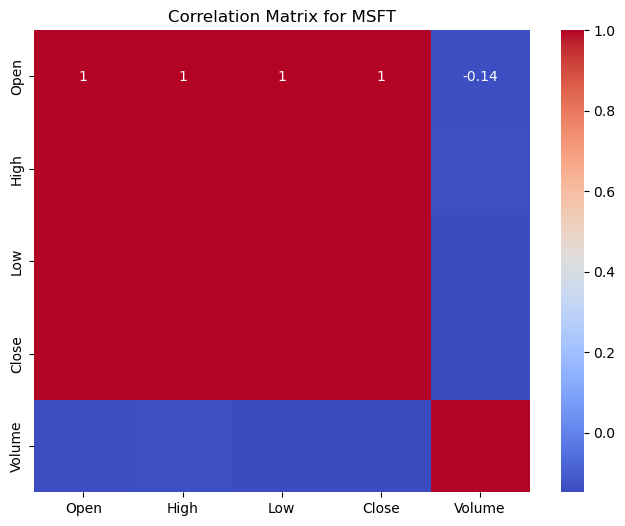

In [23]:
# Correlation heatmap for Microsoft
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data_frames['MSFT'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for MSFT')
plt.show()

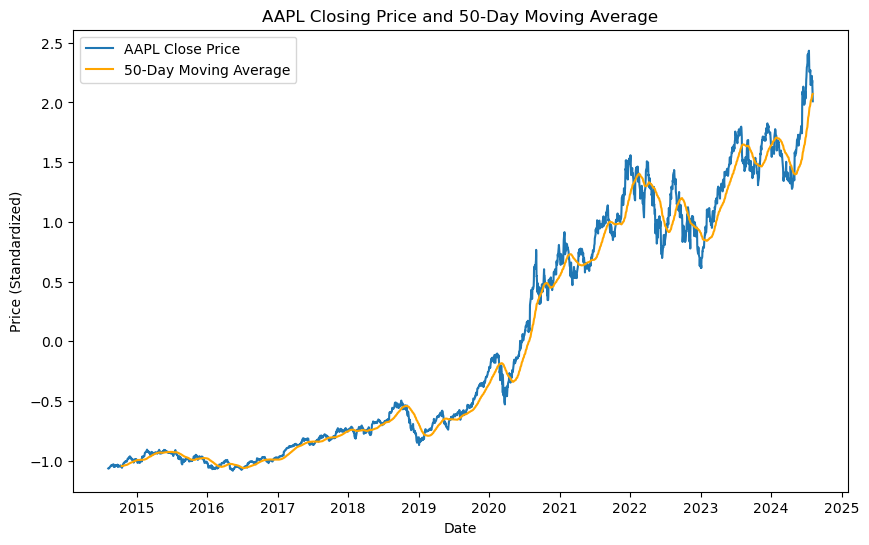

In [24]:
# Calculate and plot a 50-day moving average for Apple's closing price
df = cleaned_data_frames['AAPL']
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='AAPL Close Price')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='orange')
plt.title('AAPL Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

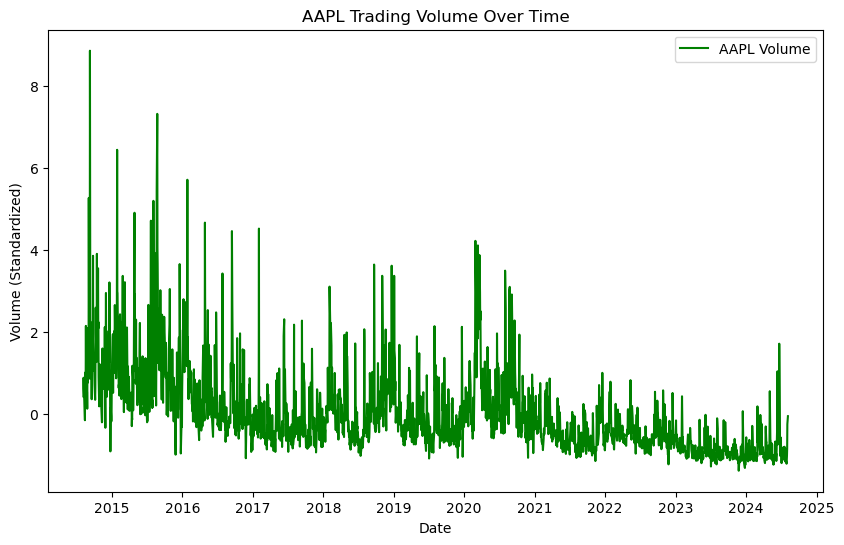

In [25]:
# Plot volume over time for Apple
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='AAPL Volume', color='green')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Standardized)')
plt.legend()
plt.show()

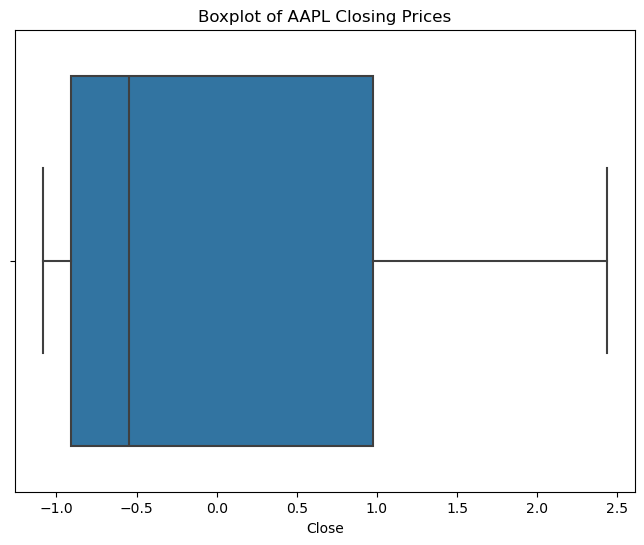

In [26]:
# Boxplot to identify outliers in Apple's closing prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of AAPL Closing Prices')
plt.show()

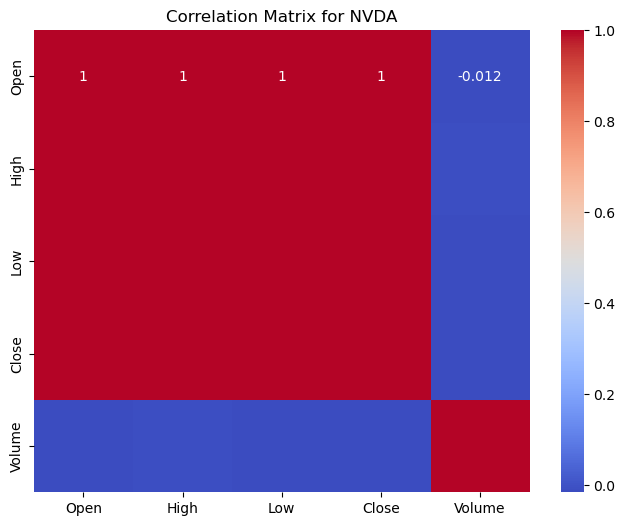

In [27]:
#Heatmap for NVdia
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data_frames['NVDA'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for NVDA')
plt.show()

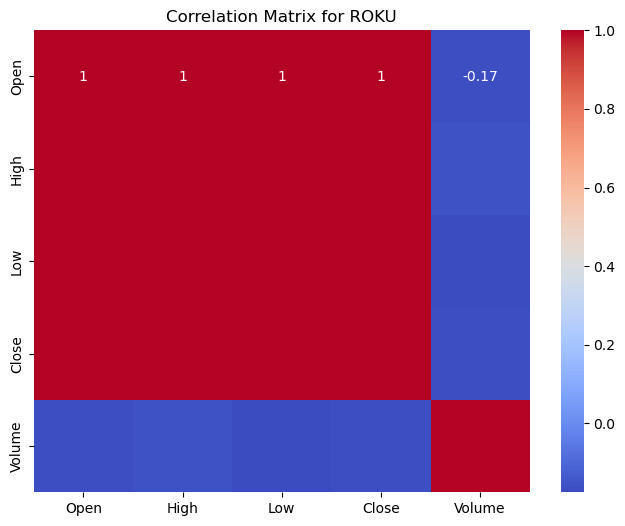

In [28]:
# Heatmap for ROKU
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data_frames ['ROKU'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for ROKU')
plt.show()

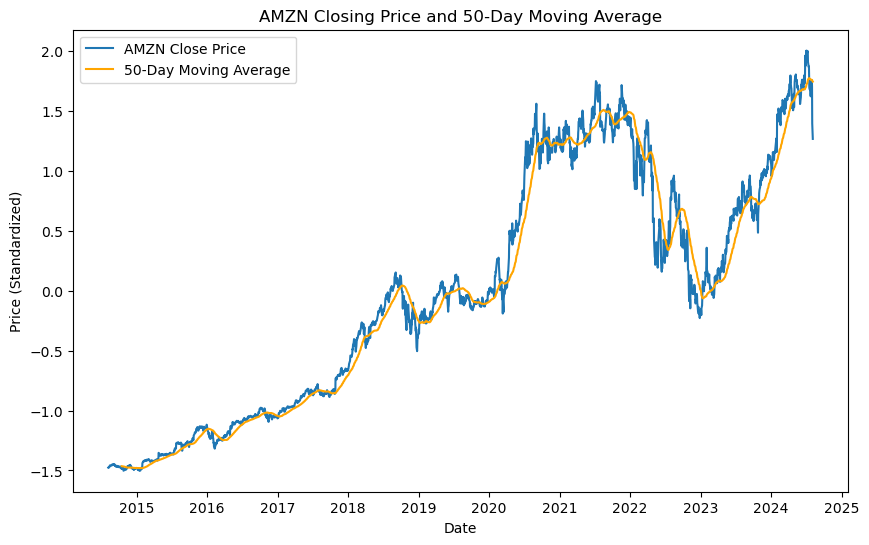

In [29]:
# Calculate and plot a 50-day moving average for Amazon's closing price
df = cleaned_data_frames['AMZN']
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='AMZN Close Price')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='orange')
plt.title('AMZN Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

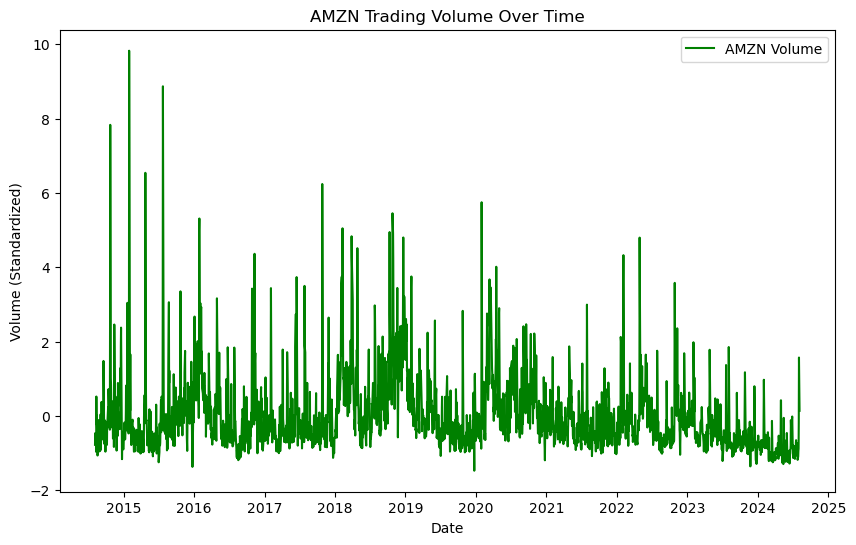

In [30]:
# Plot volume over time for Amazon
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='AMZN Volume', color='green')
plt.title('AMZN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Standardized)')
plt.legend()
plt.show()

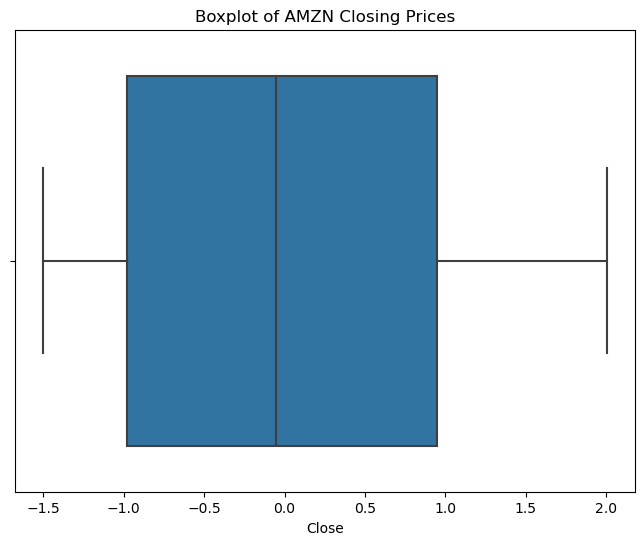

In [31]:
# Boxplot to identify outliers in Amazon's closing prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of AMZN Closing Prices')
plt.show()

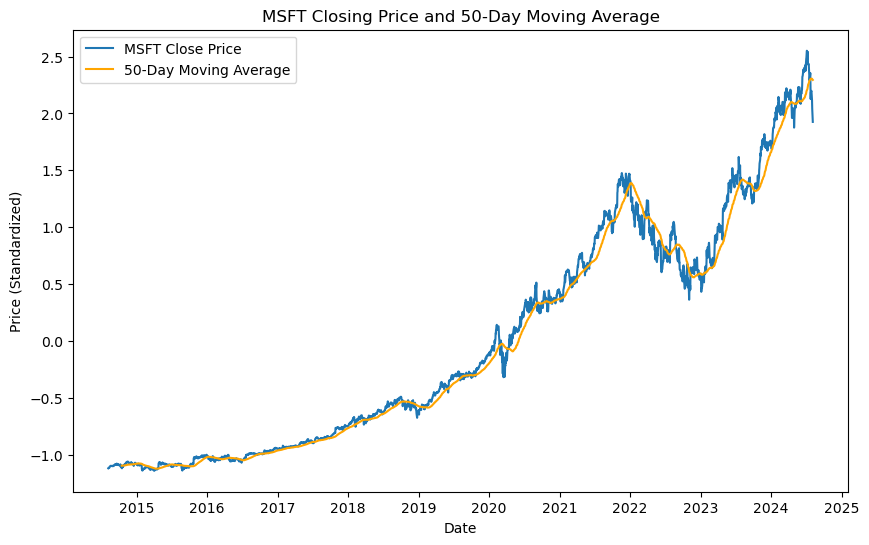

In [32]:
# Calculate and plot a 50-day moving average for Microsoft's closing price
df = cleaned_data_frames['MSFT']
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='MSFT Close Price')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='orange')
plt.title('MSFT Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

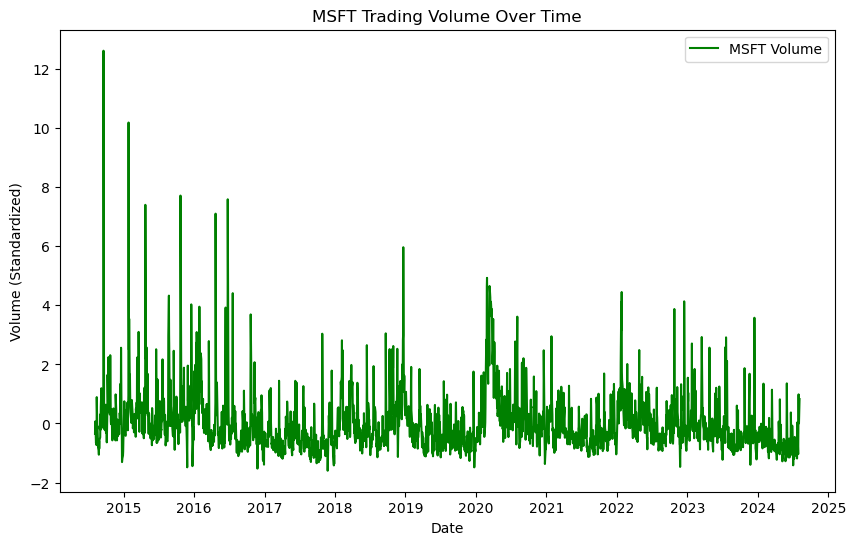

In [33]:
# Plot volume over time for Microsoft
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='MSFT Volume', color='green')
plt.title('MSFT Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Standardized)')
plt.legend()
plt.show()

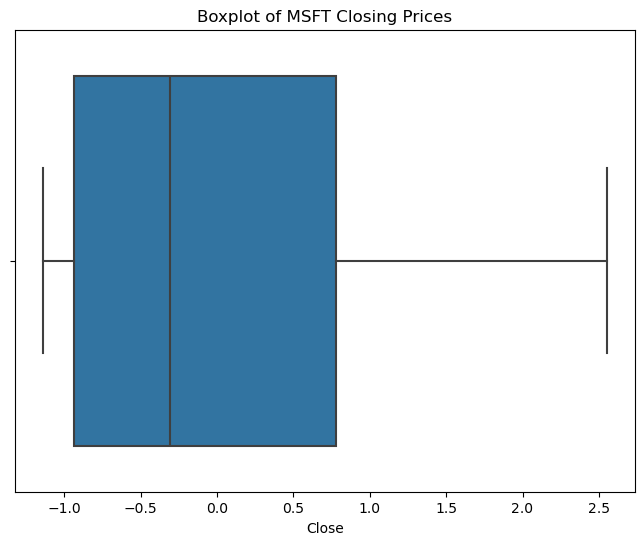

In [34]:
# Boxplot to identify outliers in Microsoft's closing prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of MSFT Closing Prices')
plt.show()

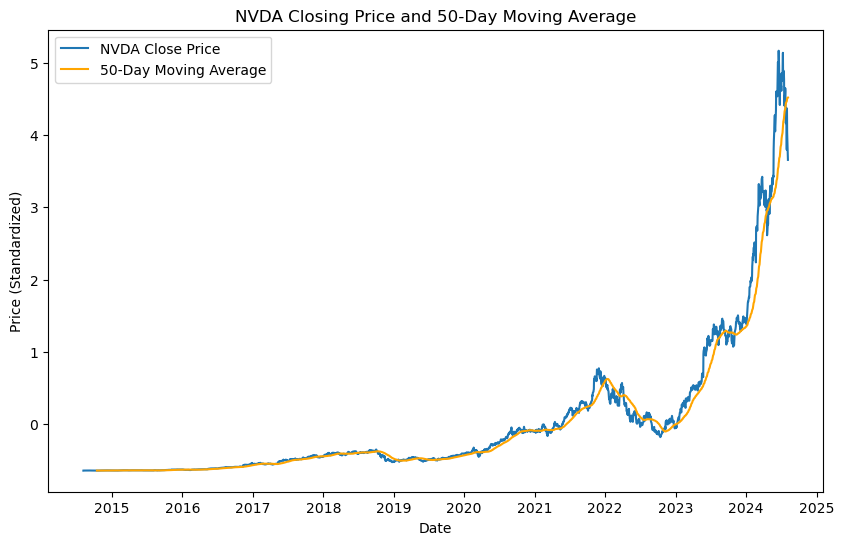

In [35]:
# Calculate and plot a 50-day moving average for NVdia's closing price
df = cleaned_data_frames['NVDA']
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='NVDA Close Price')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='orange')
plt.title('NVDA Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

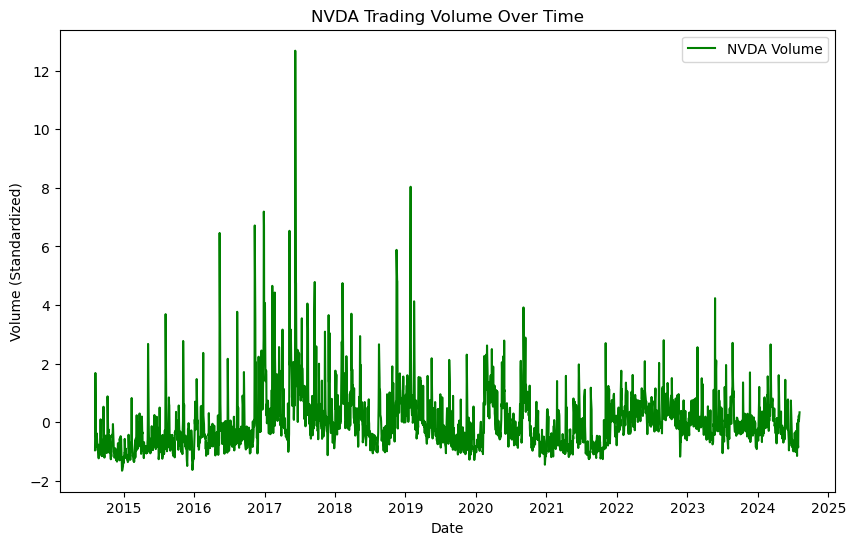

In [36]:
# Plot volume over time for NVdia
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='NVDA Volume', color='green')
plt.title('NVDA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Standardized)')
plt.legend()
plt.show()

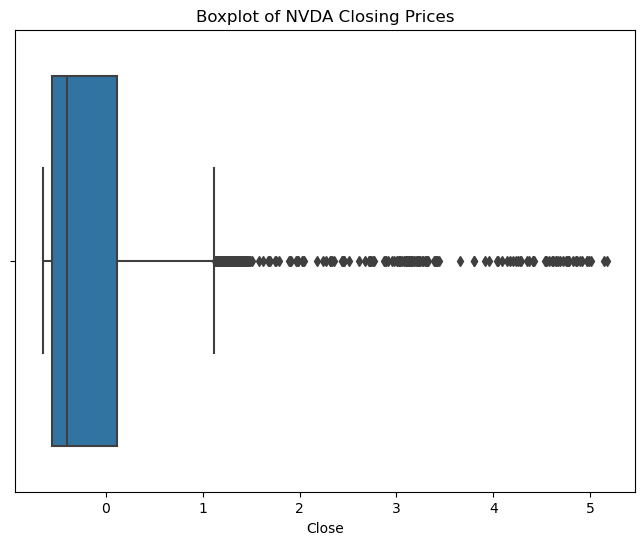

In [37]:
# Boxplot to identify outliers in NVdia's closing prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of NVDA Closing Prices')
plt.show()

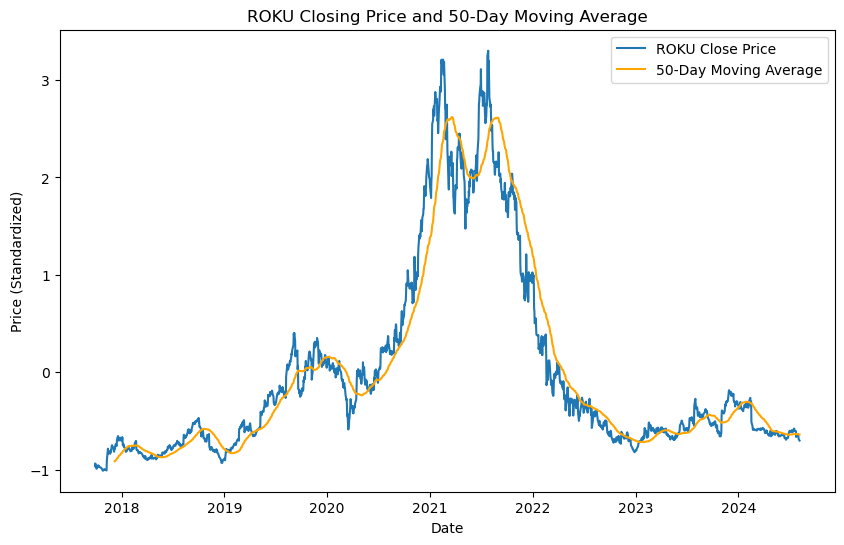

In [38]:
# Calculate and plot a 50-day moving average for ROKU's closing price
df = cleaned_data_frames['ROKU']
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='ROKU Close Price')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='orange')
plt.title('ROKU Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

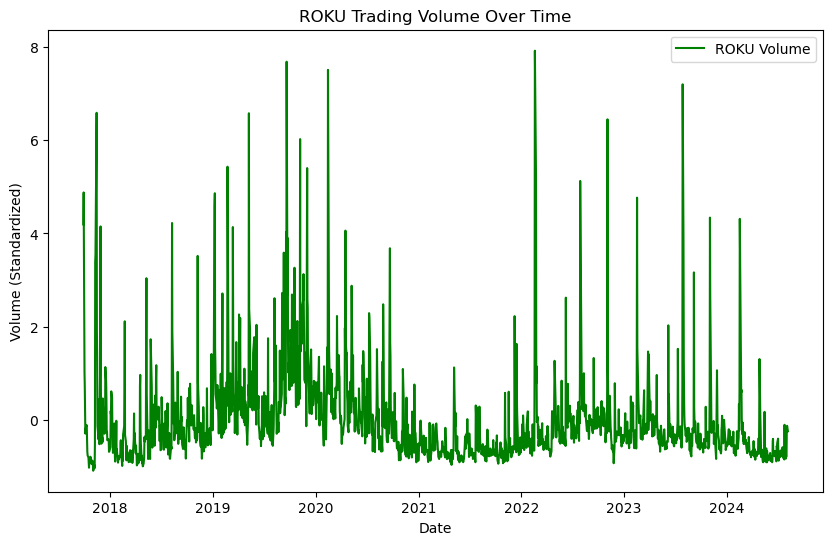

In [39]:
# Plot volume over time for ROKU
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='ROKU Volume', color='green')
plt.title('ROKU Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Standardized)')
plt.legend()
plt.show()

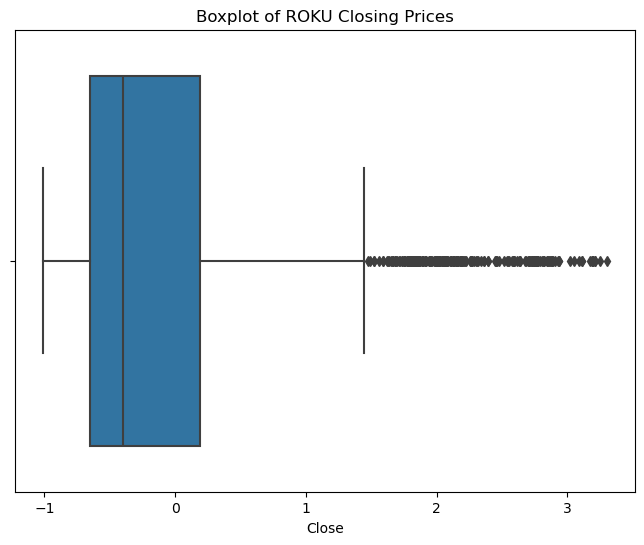

In [40]:
# Boxplot to identify outliers in ROKU's closing prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of ROKU Closing Prices')
plt.show()

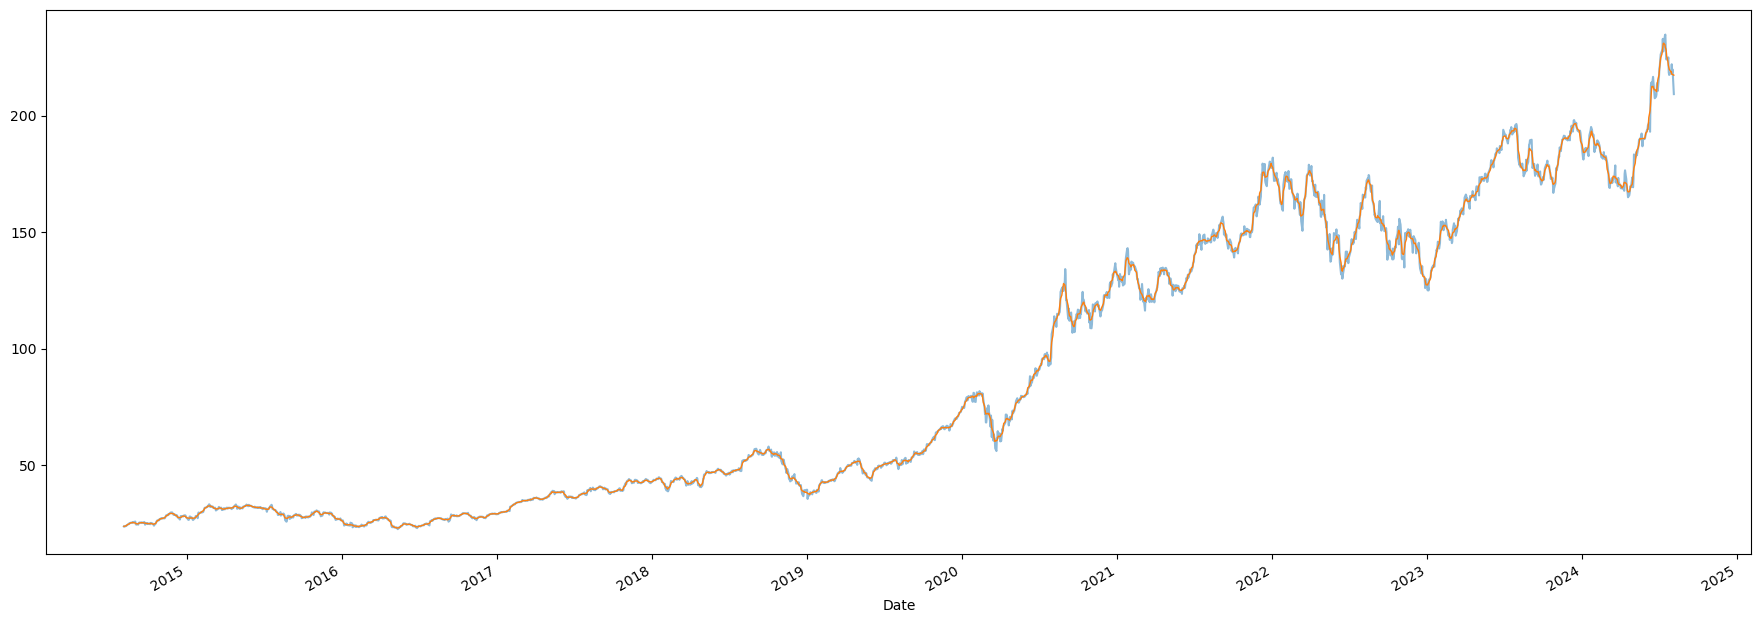

In [41]:
trend_apple= data_frames['AAPL']['Close'].rolling(window=7,
                                         center=True,
                                         min_periods=4).mean()

ax_apple=data_frames['AAPL']['Close'].plot(figsize=(22,8), alpha=0.5)
ax_apple=trend_apple.plot(ax=ax_apple, linewidth=1)


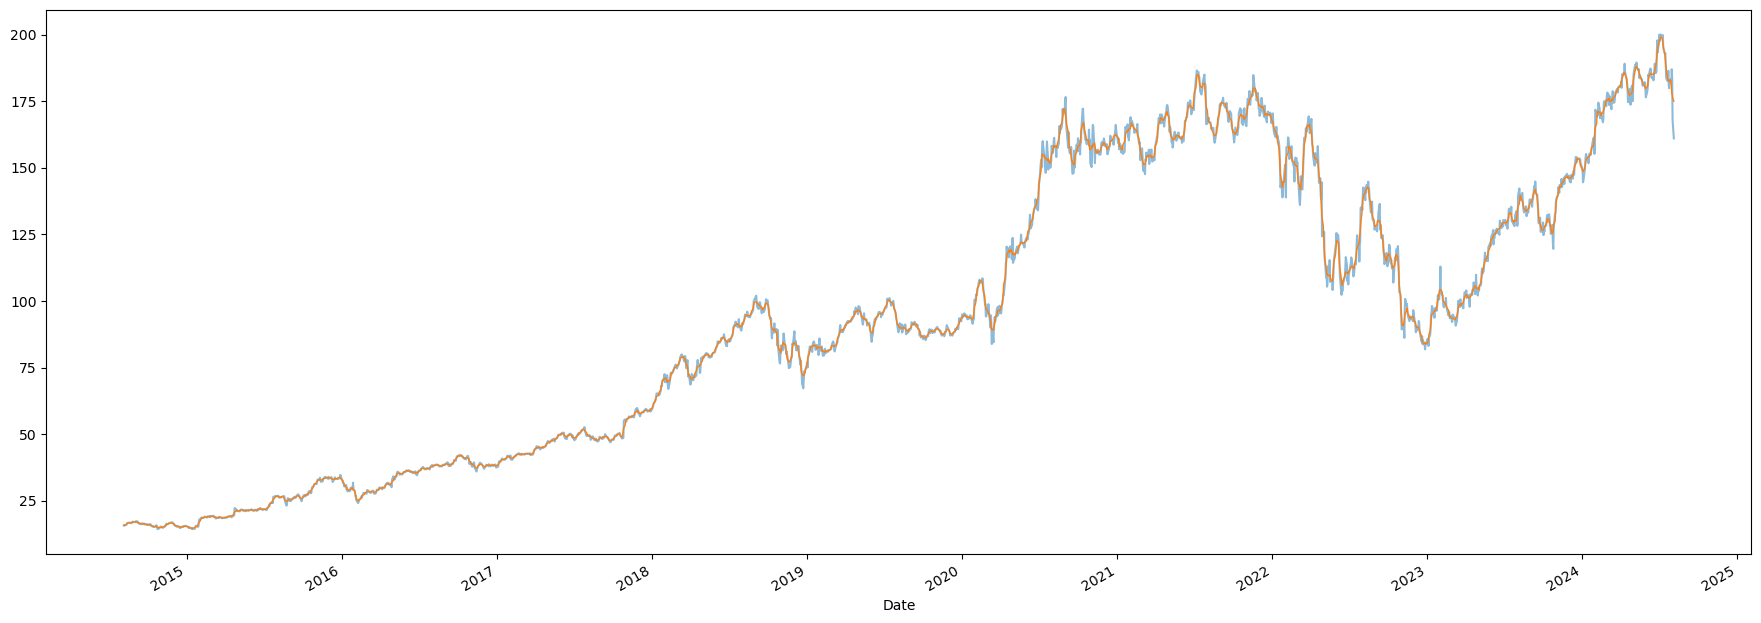

In [42]:
trend_amazon= data_frames['AMZN']['Close'].rolling(window=7,
                                         center=True,
                                         min_periods=4).mean()

ax_amazon=data_frames['AMZN']['Close'].plot(figsize=(22,8), alpha=0.5)
ax_amazon=trend_amazon.plot(ax=ax_amazon, linewidth=1)

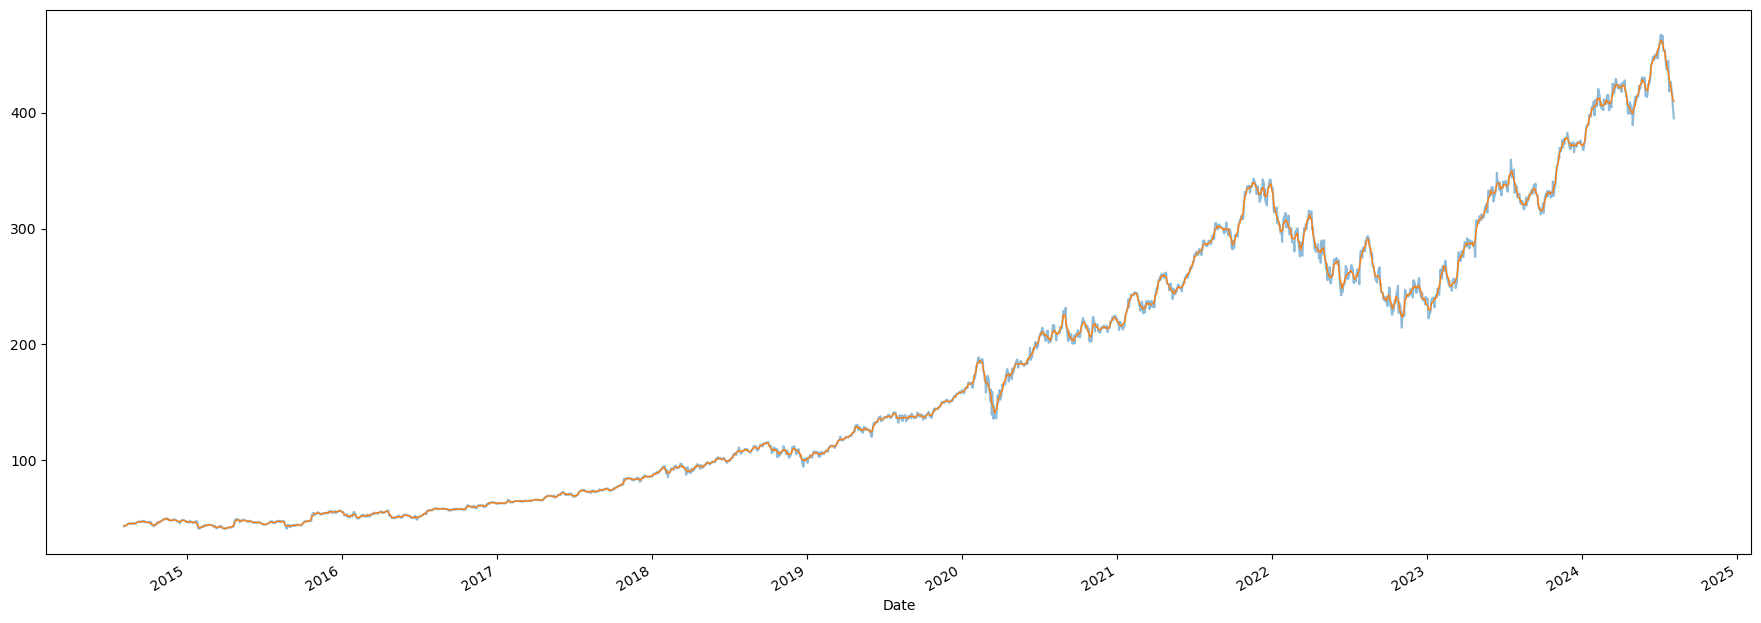

In [43]:
trend_microsoft= data_frames['MSFT']['Close'].rolling(window=7,
                                         center=True,
                                         min_periods=4).mean()

ax_microsoft=data_frames['MSFT']['Close'].plot(figsize=(22,8), alpha=0.5)
ax_microsoft=trend_microsoft.plot(ax=ax_microsoft, linewidth=1)


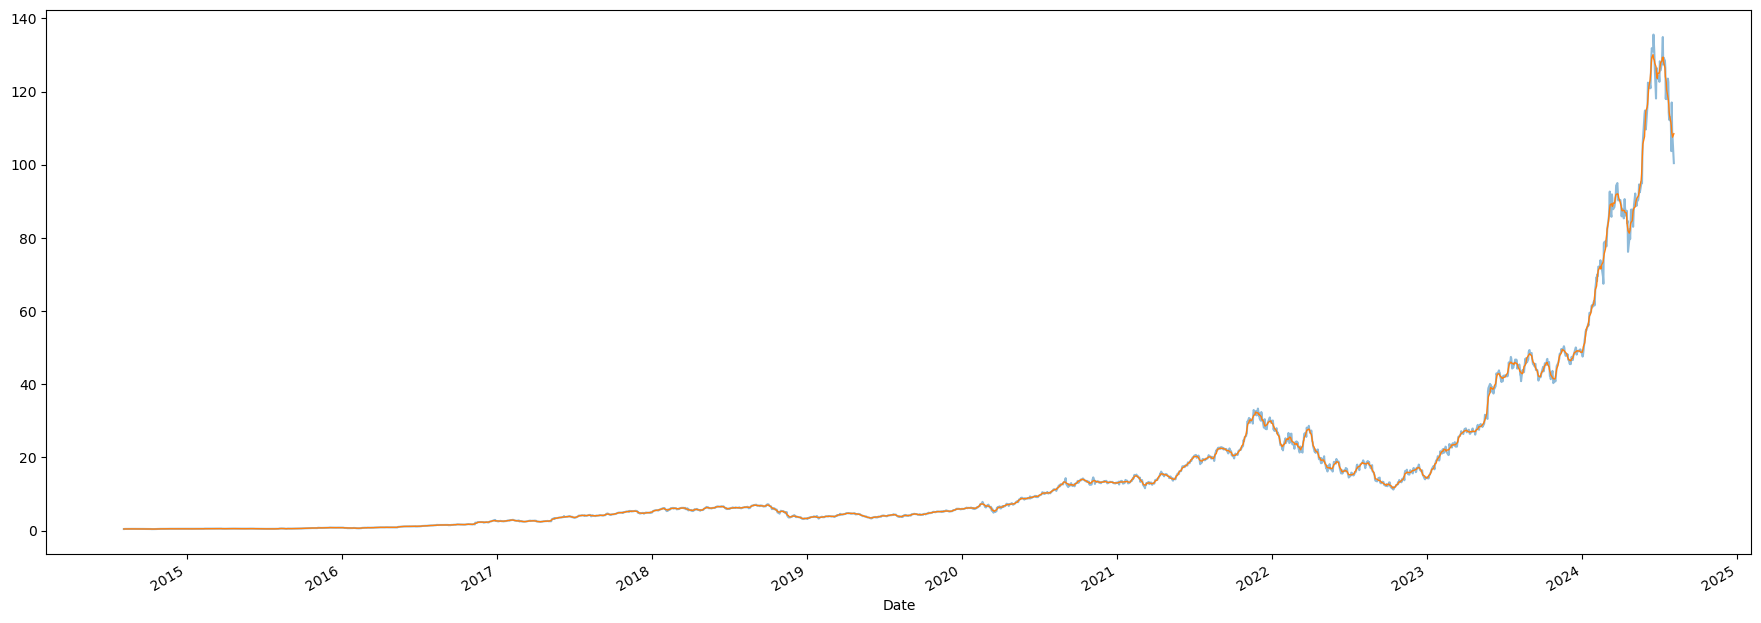

In [44]:
trend_nvidia= data_frames['NVDA']['Close'].rolling(window=7,
                                         center=True,
                                         min_periods=4).mean()

ax_nvidia=data_frames['NVDA']['Close'].plot(figsize=(22,8), alpha=0.5)
ax_nvidia=trend_nvidia.plot(ax=ax_nvidia, linewidth=1)

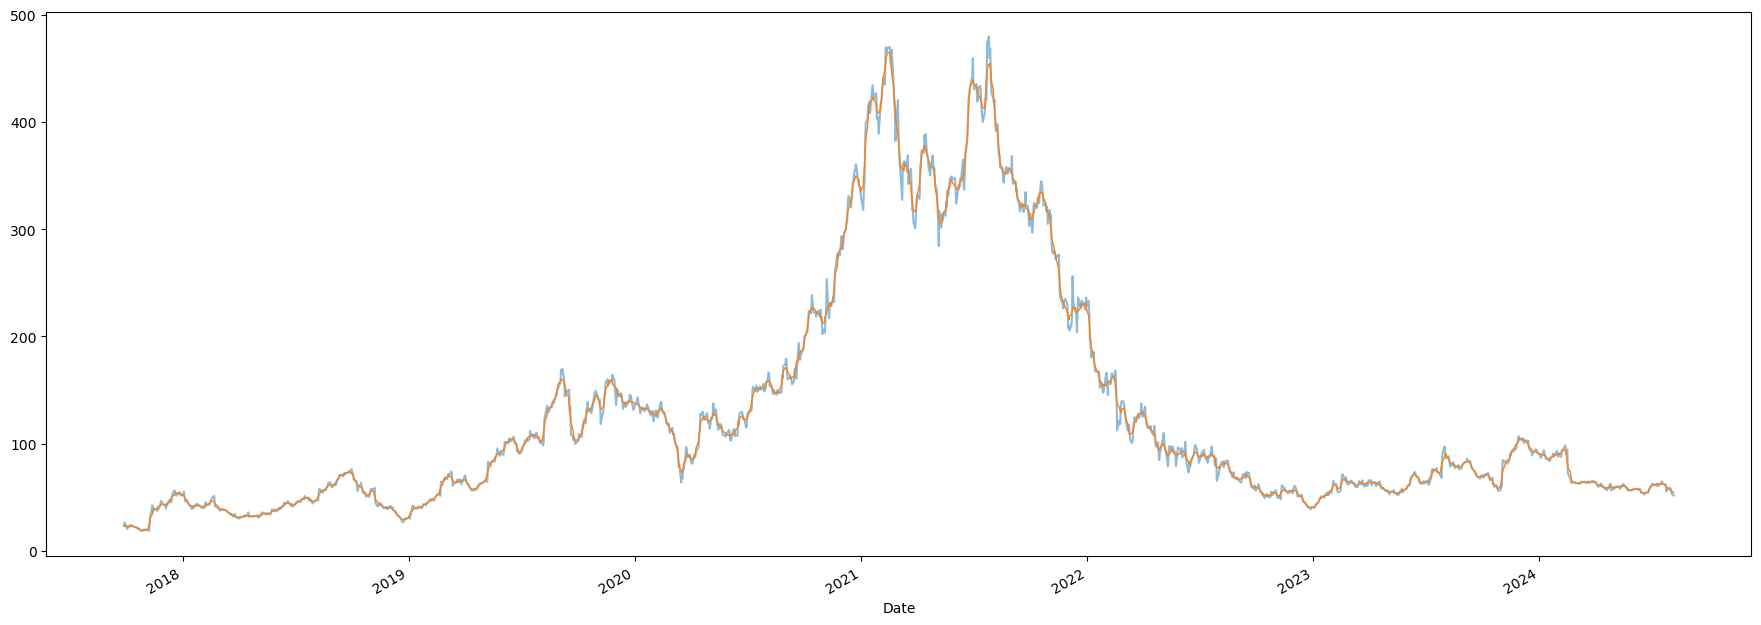

In [45]:
trend_roku= data_frames['ROKU']['Close'].rolling(window=7,
                                         center=True,
                                         min_periods=4).mean()

ax_roku=data_frames['ROKU']['Close'].plot(figsize=(22,8), alpha=0.5)
ax_roku=trend_roku.plot(ax=ax_roku, linewidth=1)

In [46]:
# MODEL FIT

train_apple=data_frames['AAPL']['High'].iloc[:-4]

x_train=[]
y_train=[]

for i in range(2, len (train_apple)):
    x_train.append(train_apple[i-2:i])
    y_train.append(train_apple[i])


C:\Users\vkole\AppData\Local\Temp\ipykernel_30588\1509106378.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train.append(train_apple[i])


In [47]:
import math

train_apple_len=math.ceil(len(train_apple)*1)
print(f"We are using  first {train_apple_len} rows for training")

We are using  first 2512 rows for training


In [48]:
test_data_apple=train_apple[train_apple_len-2:]

x_val_apple=[]
y_val_apple=[]

for i in range(2, len(test_data_apple)):
    x_val_apple.append(test_data_apple[i-2:i])
    y_val_apple.append(test_data_apple[i])
